<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Quiz 2 - Solutions
**Version 2**

This notebook contains 5 parts. You are to fill in this quiz with your answers, taking special care to follow the directions _exactly_.

To **submit** your quiz, drop your completed notebook in the file uploader in the provided Google Form.

### Quiz Information:
- This is an "open book" quiz - you may use any resources! This includes Jupyter notebooks, Google, StackOverflow, and your notes. ANY RESOURCE YOU USE MUST BE CITED (comment your code with links, which lesson you got the inspiration from, etc.) and failure to cite resources you use will be considered plagiarism. 
- You may NOT work with anyone else on this quiz (your classmates, your instructor, etc.).
- You will have one hour to take this quiz.

## Part 1: Getting the data
The dataset provided in this repository (`./data/auto.csv`) consists of various descriptions of cars along with their miles per gallon (mpg). A data dictionary for this dataset can be found in the README.

**Read in the data and display the first 5 rows.**

### Rubric (2pts total):

* +1 : Correctly read in the csv and save it as a variable
* +1 : Successfully displayed the first 5 rows of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# read in data
cars = pd.read_csv('./data/auto.csv')

In [3]:
# display data
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,1


## Part 2: Data Cleaning

There are a few issues with this dataset. To help you identify and fix these issues, you are told:
- The `origin` column should not be a part of this dataset.
- Any null values in the `cylinders` column are clerical errors. They should all be 4's.
- All columns in this dataset should be numeric. If there are unknown values in any column other than the `cylinders` column, they should be dropped.

**Please clean up the dataset.**

### Rubric (4pts total)
* +1 : Removed the origin column
* +1 : Replaced NaNs with 4's in the cylinders column
* +1 : Dropped all observations with `?` in the horsepower column
* +1 : Converted the horsepower column to int or float

In [4]:
# delete origin column
cars.drop(columns=['origin'], inplace=True)

In [5]:
# replace nans with 4's
cars['cylinders'] = cars['cylinders'].fillna(4)

In [6]:
# drop rows with unknown values
to_drop = cars[cars['horsepower'] == '?'].index

cars.drop(to_drop, inplace=True)

In [7]:
# make sure all columns are numeric
cars['horsepower'] = cars['horsepower'].astype(float)

## Part 3: EDA

You are asked to give the following to the hiring manager:
- Descriptive statistics of the horsepower column
- A scatterplot of weight compared to acceleration colored orange with a title and axis labels

**Please display these.**

### Rubric (3pts total):

* +1 : Displayed the summary statistics of the horsepower column
* +1 : Successfully displayed a scatterplot of the correct columns
* +1 : For coloring the scatterplot orange and adding a title and axis labels

In [8]:
# summary statistics
cars['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

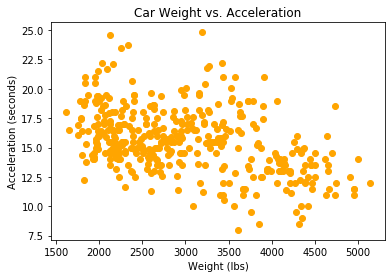

In [9]:
# scatterplot
plt.scatter(cars['weight'],
            cars['acceleration'],
            color = 'orange')
plt.title('Car Weight vs. Acceleration')
plt.xlabel('Weight (lbs)')
plt.ylabel('Acceleration (seconds)');

## Part 4: Modeling

**Fit a linear regression model to predict the car's mpg. You should use all available features in your model.** 
* Please use a random state of `1234` when splitting your data
* Use 85% of the dataset for training and the other 15% for testing
* Print out and interpret the testing R<sup>2</sup>.

### Rubric (6pts total):

* +1 : For splitting data into correct X and y
* +1 : For using the correct random state
* +1 : For using an 85/15 split for training/testing
* +1 : For correctly instantiating and fitting a linear regression
* +1 : For calculating the r2 of the testing set
* +1 : For correctly interpreting the r2 of the testing set

In [10]:
# split data into X and y
X = cars.drop(columns = 'mpg')
y = cars['mpg']

# use 85/15% training/testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1234)

In [11]:
# Linear regression
lm = LinearRegression()

lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.7110950077997611

In [12]:
# print out testing r2
lm.score(X_test, y_test)

0.6736680096349268

In [13]:
# interpret the testing r2:
# 67.4% of the variability in mpg 
# can be explained by the X's in our model

## Part 5: Interpretation

The hiring manager is especially interested in learning more about the effects of [horsepower](https://www.britannica.com/science/horsepower) on mpg.

**They ask you what effect the horsepower has on mpg. How would you respond? Be as specific as possible.**

### Rubric (2pts total):

* +1 : For correct interpretation of the coefficient
* +1 : For adding a phrase along the lines of "holding all else constant"

In [14]:
[f'{X.columns[i]}: {lm.coef_[i]}' for i in range(0, len(X.columns))]

['cylinders: -0.610143439587066',
 'displacement: 0.0072600971078642645',
 'horsepower: -0.0338640024887199',
 'weight: -0.005727003751745039',
 'acceleration: 0.17824753192334555']

> Holding all else constant, for every one horsepower increase, we expect the mpg to decrease by about 0.034.